In [1]:
#%%% relevent packages & modules
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn                         import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model            import LogisticRegression
from sklearn.neighbors               import KNeighborsClassifier
from sklearn.metrics                 import confusion_matrix
from sklearn.metrics                 import accuracy_score
from sklearn.metrics                 import classification_report
from sklearn.metrics                 import plot_confusion_matrix

In [2]:
#%%% data preparetion
dta = pd.read_excel('/Users/jialinshang/Desktop/marketing/final project/Oculus_reviews.xlsx').reset_index()

#filter out noise information
dta1 = dta[['index','scrapping_date','one_review_text','review_date','one_review_stars','Rating']].copy()
print(dta1)

#Cleaning the review_text
dta1['one_review_text'] = dta1['one_review_text'].str.replace("n't"," not")
dta1['one_review_text'] = dta1['one_review_text'].str.replace("I'm","I am")
dta1['one_review_text'] = dta1['one_review_text'].str.replace("'ll"," will")

dta1['one_review_text'] = dta1['one_review_text'].str.replace("It's","It is")
dta1['one_review_text'] = dta1['one_review_text'].str.replace("it's","It is")
dta1['one_review_text'] = dta1['one_review_text'].str.replace("that's","that is")

      index          scrapping_date  \
0         0 2021-11-13 09:26:56.988   
1         1 2021-11-13 09:26:57.021   
2         2 2021-11-13 09:26:57.077   
3         3 2021-11-13 09:26:57.108   
4         4 2021-11-13 09:26:57.133   
...     ...                     ...   
5049   5049 2021-11-13 10:11:32.348   
5050   5050 2021-11-13 10:11:32.368   
5051   5051 2021-11-13 10:11:32.388   
5052   5052 2021-11-13 10:11:32.408   
5053   5053 2021-11-13 10:11:32.428   

                                        one_review_text  \
0     WOW!!!  My wife and I are 60, haven't had this...   
1     Let me start with this. If you want to get an ...   
2     I've been exploring worlds and experiencing th...   
3     VR and the Quest 2 is absolutely incredible. I...   
4     I have every oculus headset sold and this one ...   
...                                                 ...   
5049  The Oculus Quest 2 brings affordable quality V...   
5050  Fun but battery sucks. To me forever to downlo...   


In [3]:
#%%% data splitting
np.random.seed(1)
dta1['ML_group']   = np.random.randint(100, size = dta1.shape[0])

#80% for trainning; 10% for validating; 10% for testing
inx_train          = dta1.ML_group  <  80                                
inx_valid          = (dta1.ML_group >= 80) & (dta1.ML_group<90)          
inx_test           = (dta1.ML_group >= 90)

In [4]:
#%%% text vectorization
corpus      = dta1.one_review_text.to_list()
vectorizer  = CountVectorizer(lowercase   = True,
                              ngram_range = (1,1),
                              max_df      = 0.85,
                              min_df      = 0.01);
X           = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
vc_mtx=vectorizer.transform(corpus)

vc_mtx.toarray()

['10', '100', '256gb', 'able', 'about', 'absolutely', 'account', 'actually', 'after', 'again', 'ages', 'all', 'almost', 'alone', 'already', 'also', 'always', 'am', 'amazing', 'an', 'and', 'another', 'any', 'anyone', 'anything', 'app', 'apps', 'are', 'around', 'as', 'at', 'available', 'away', 'awesome', 'back', 'bad', 'battery', 'be', 'beat', 'because', 'been', 'before', 'being', 'best', 'better', 'big', 'birthday', 'bit', 'blast', 'both', 'bought', 'box', 'but', 'buy', 'buying', 'by', 'ca', 'cable', 'came', 'can', 'charge', 'christmas', 'clear', 'come', 'comes', 'comfortable', 'computer', 'connect', 'console', 'content', 'controllers', 'cool', 'cost', 'could', 'couple', 'daughter', 'day', 'definitely', 'desktop', 'device', 'did', 'different', 'do', 'does', 'don', 'down', 'download', 'easily', 'easy', 'elite', 'enjoy', 'enjoyed', 'enjoying', 'enjoys', 'enough', 'entertainment', 'entire', 'especially', 'even', 'ever', 'every', 'everyone', 'everything', 'excellent', 'exercise', 'expected'

array([[0, 1, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [5]:
#%%% TVT Split
y_train   = dta1.Rating[inx_train].to_numpy()
y_valid   = dta1.Rating[inx_valid].to_numpy()
y_test    = dta1.Rating[inx_test ].to_numpy()

X_train   = X[np.where(inx_train)[0],:]
X_valid   = X[np.where(inx_valid)[0],:]
X_test    = X[np.where(inx_test) [0],:]

# check wheher all reviews are assigned to groups
X_train.shape[0]+X_valid.shape[0]+X_test.shape[0] == 5054

True

Text(0.5, 0, 'K neighbors')

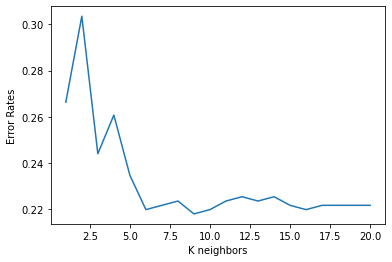

In [11]:
#%%% KNN classification
test_error_rates = []
k_max            = 20
for k in range(1,k_max+1):
    knn_model   = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)
    y_hat_valid = knn_model.predict(X_valid)
    test_error  = 1-accuracy_score(y_valid, y_hat_valid)
    test_error_rates.append(test_error)

# minimum the test error
k =np.argmin(test_error_rates)
min(test_error_rates)
best_k=test_error_rates.index(min(test_error_rates))+1

plt.plot(range(1,k_max+1),test_error_rates)
plt.ylabel('Error Rates')
plt.xlabel('K neighbors')

      index          scrapping_date  \
0         0 2021-11-13 09:26:56.988   
1         1 2021-11-13 09:26:57.021   
2         2 2021-11-13 09:26:57.077   
3         3 2021-11-13 09:26:57.108   
4         4 2021-11-13 09:26:57.133   
...     ...                     ...   
5049   5049 2021-11-13 10:11:32.348   
5050   5050 2021-11-13 10:11:32.368   
5051   5051 2021-11-13 10:11:32.388   
5052   5052 2021-11-13 10:11:32.408   
5053   5053 2021-11-13 10:11:32.428   

                                        one_review_text  \
0     WOW!!!  My wife and I are 60, have not had thi...   
1     Let me start with this. If you want to get an ...   
2     I've been exploring worlds and experiencing th...   
3     VR and the Quest 2 is absolutely incredible. I...   
4     I have every oculus headset sold and this one ...   
...                                                 ...   
5049  The Oculus Quest 2 brings affordable quality V...   
5050  Fun but battery sucks. To me forever to downlo...   


/Users/jialinshang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jialinshang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jialinshang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


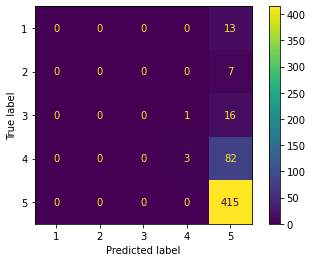

In [12]:
#predict results
results_list_knn_actual = []
knn                     = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

results_list_knn_actual.append(
        np.concatenate([knn.predict(X_train),
                 knn.predict(X_valid),
                 knn.predict(X_test )]))

results_list_knn_actual = pd.DataFrame(results_list_knn_actual).transpose()
dta2=dta1
dta2['Predicted_star']  = results_list_knn_actual[0]
print(dta2)

#confusion matrix and accuracy report
confusion_matrix(y_valid, y_hat_valid)
plot_confusion_matrix(knn_model, X_valid, y_valid)
print(classification_report(y_valid, y_hat_valid))

In [13]:
#%%% logistic regression
categories         = pd.DataFrame(np.sort(np.unique(y_train))).reset_index()
categories.columns = ['index','label']   

ccp_train_list = []
ccp_valid_list = []
ccp_test_list  = []

for cat in categories['label'].to_list(): #the conditional probability for each x
    y_train_c = 1*(y_train==cat) #dummy variable
    clf       = linear_model.LogisticRegression(tol          = 0.0001,
                                                max_iter     = 10000,
                                                random_state = None).fit(X_train, y_train_c)
    ccp_train_list.append(  clf.predict_proba(X_train)[:,1]) # predict the probabilities
    ccp_valid_list.append(  clf.predict_proba(X_valid)[:,1])
    ccp_test_list.append (  clf.predict_proba(X_test) [:,1])

' . Topic probability matrix'
ccp_train = pd.DataFrame(ccp_train_list).transpose()
ccp_valid = pd.DataFrame(ccp_valid_list).transpose()
ccp_test  = pd.DataFrame(ccp_test_list).transpose()
#bias estimated: the sum is not equal to one 
' . Choosing your predictive category for the y'
ccp_train['index_hat'] =  ccp_train.idxmax(axis=1) #
ccp_valid['index_hat'] =  ccp_valid.idxmax(axis=1)
ccp_test ['index_hat'] =  ccp_test.idxmax(axis=1)
ccp_train              =  ccp_train.merge(categories, 
                          left_on  = 'index_hat' ,
                          right_on = 'index'     , 
                          how      = 'left').rename(columns={'label':'label_hat'}).drop(['index','index_hat'],axis=1)
ccp_valid              =  ccp_valid.merge(categories,
                          left_on  = 'index_hat',
                          right_on = 'index', 
                          how      = 'left').rename(columns={'label':'label_hat'}).drop(['index','index_hat'],axis=1)
ccp_test               =  ccp_test.merge(categories,
                          left_on  = 'index_hat' ,
                          right_on = 'index' ,
                          how      = 'left').rename(columns={'label':'label_hat'}).drop(['index','index_hat'],axis=1)

ccp_train['y_train']   = y_train
ccp_valid['y_valid']   = y_valid
ccp_test ['y_test']    = y_test

print({'ccp_train'  : ccp_train,'ccp_valid'  : ccp_valid,'ccp_test'   : ccp_test})

{'ccp_train':                  0         1         2             3         4  label_hat  \
0     2.798561e-05  0.000017  0.000417  1.549237e-04  0.999939          5   
1     6.198270e-05  0.000005  0.000358  5.297834e-01  0.571390          5   
2     1.968480e-02  0.000169  0.034365  2.631225e-08  0.999232          5   
3     2.291068e-07  0.000131  0.006631  4.426758e-02  0.988384          5   
4     1.844663e-03  0.003392  0.009844  5.466301e-01  0.342855          4   
...            ...       ...       ...           ...       ...        ...   
4035  8.810842e-01  0.002969  0.026884  8.237162e-03  0.271882          1   
4036  7.525876e-01  0.000035  0.006099  4.469428e-02  0.479055          1   
4037  9.861486e-01  0.004576  0.007532  9.528380e-04  0.414793          1   
4038  1.106903e-02  0.883101  0.051605  7.327473e-03  0.205108          2   
4039  3.270665e-01  0.005561  0.083742  3.843218e-01  0.221014          4   

      y_train  
0           5  
1           4  
2           5

In [14]:
print(confusion_matrix(y_test, ccp_test['label_hat']))
print(classification_report(y_test, ccp_test['label_hat']))

[[  9   0   1   3   5]
 [  0   1   0   0   1]
 [  1   0   1   3   6]
 [  0   0   0  21  34]
 [  0   1   1  13 376]]
              precision    recall  f1-score   support

           1       0.90      0.50      0.64        18
           2       0.50      0.50      0.50         2
           3       0.33      0.09      0.14        11
           4       0.53      0.38      0.44        55
           5       0.89      0.96      0.92       391

    accuracy                           0.86       477
   macro avg       0.63      0.49      0.53       477
weighted avg       0.83      0.86      0.84       477

